In [1]:
# Loading the libraries
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler 

In [2]:
# Charging the dataset
df=pd.read_csv('Data.csv', index_col=0)
df.head()

,Type_of_cement,Brand,Additives,Type_of_aggregates,Design_F'c (Mpa),Curing_age_(days),Cs_(Mpa),Ts_(Mpa),Fs_(Mpa),Er_(ohm-cm),UPV_(m/s)
0,CPO 30R RS BRA,CEMEX,Opuntia_ficus_indica,Rounded,25,3,5.2154,0.5609,NaN,5.8654,2440.2989
1,CPO 30R RS BRA,CEMEX,Opuntia_ficus_indica,Rounded,25,3,5.1528,0.5727,NaN,5.9471,2417.9562
2,CPO 30R RS BRA,CEMEX,Opuntia_ficus_indica,Rounded,25,3,5.6877,0.5826,NaN,5.9965,2429.9277
3,CPO 30R RS BRA,CEMEX,Opuntia_ficus_indica,Rounded,25,3,5.1476,0.5910,NaN,5.8751,2435.0202
4,CPO 30R RS BRA,CEMEX,Opuntia_ficus_indica,Rounded,25,3,5.3406,0.5698,NaN,5.8654,2408.7969


In [3]:
df.columns

Index(['Type_of_cement', 'Brand', 'Additives', 'Type_of_aggregates',
       'Design_F'c (Mpa)', 'Curing_age_(days)', 'Cs_(Mpa)', 'Ts_(Mpa)',
       'Fs_(Mpa)', 'Er_(ohm-cm)', 'UPV_(m/s)'],
      dtype='object')

In [4]:
# Para este caso el objetivo es el Fs
df_new = df[["Design_F'c (Mpa)",'Curing_age_(days)', 'Cs_(Mpa)', 'Fs_(Mpa)', 'Er_(ohm-cm)', 'UPV_(m/s)', 'Ts_(Mpa)']]
df_new.head()

,Design_F'c (Mpa),Curing_age_(days),Cs_(Mpa),Fs_(Mpa),Er_(ohm-cm),UPV_(m/s),Ts_(Mpa)
0,25,3,5.2154,NaN,5.8654,2440.2989,0.5609
1,25,3,5.1528,NaN,5.9471,2417.9562,0.5727
2,25,3,5.6877,NaN,5.9965,2429.9277,0.5826
3,25,3,5.1476,NaN,5.8751,2435.0202,0.5910
4,25,3,5.3406,NaN,5.8654,2408.7969,0.5698


In [5]:
df_new = df_new.dropna(axis=0)

In [6]:
df_new.dtypes

Design_F'c (Mpa)       int64
Curing_age_(days)      int64
Cs_(Mpa)             float64
Fs_(Mpa)             float64
Er_(ohm-cm)          float64
UPV_(m/s)            float64
Ts_(Mpa)             float64
dtype: object

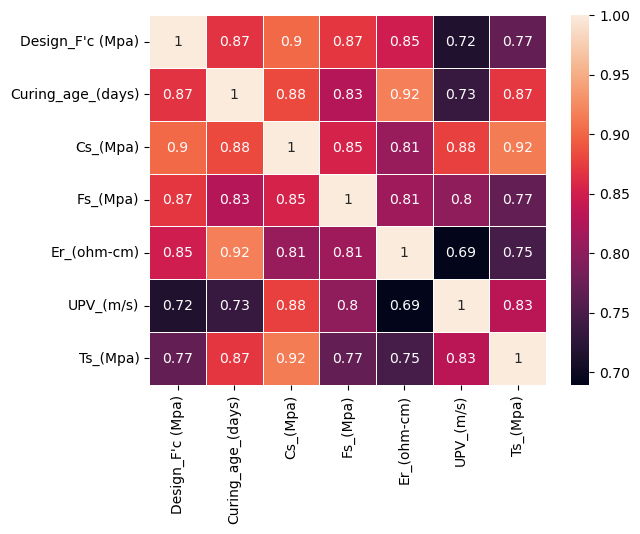

In [7]:
sns.heatmap(df_new.corr("pearson"), annot=True, linewidth=0.5);

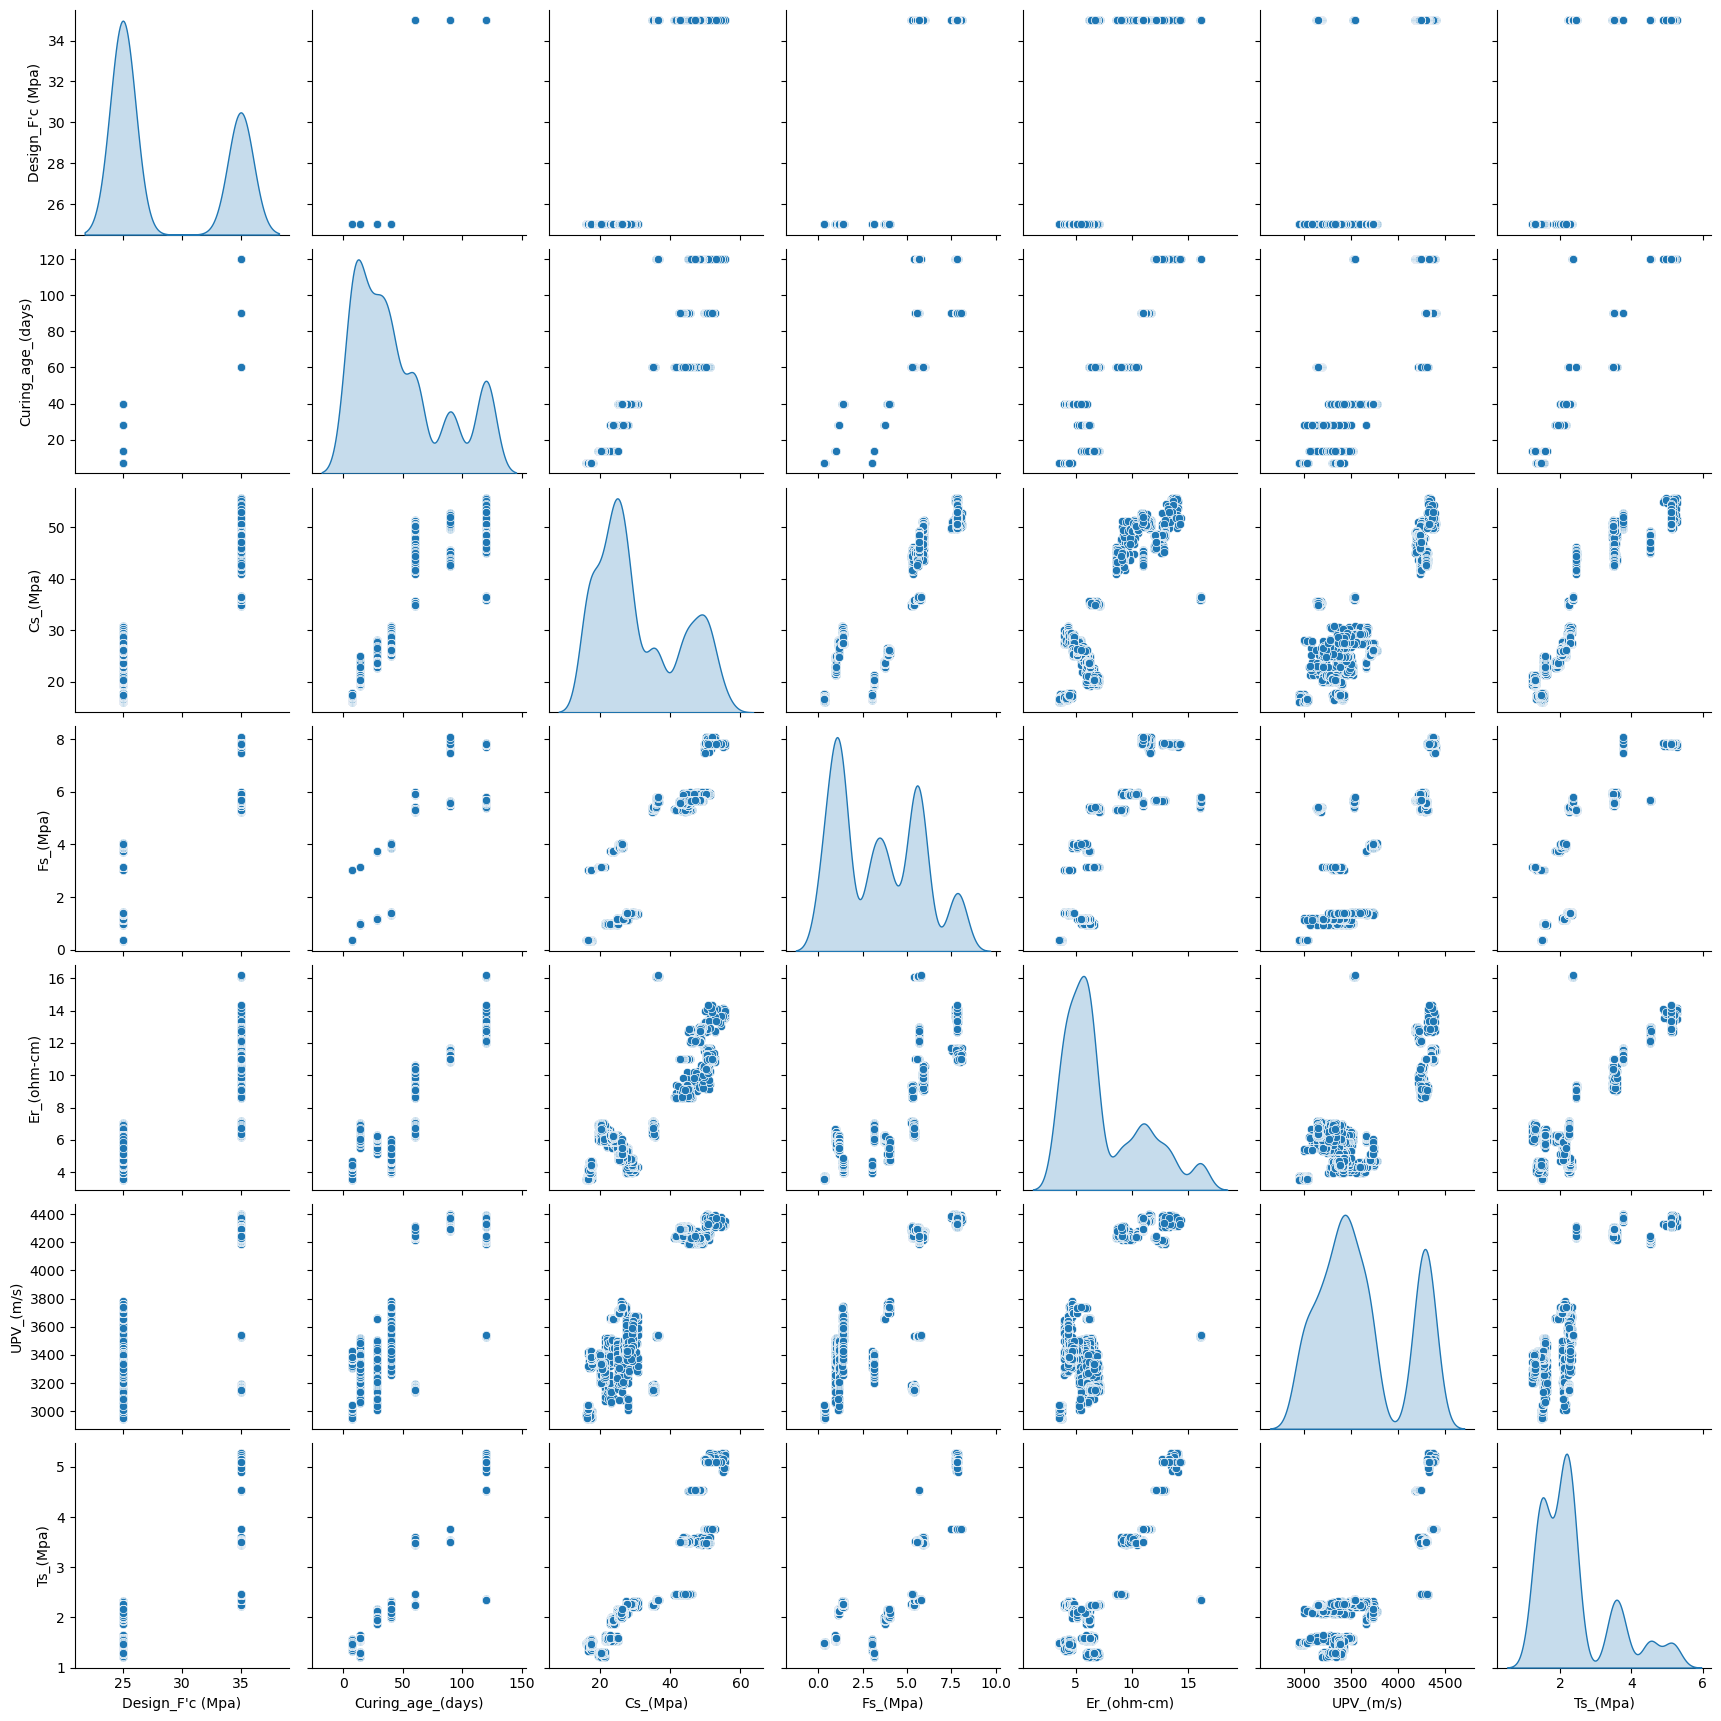

In [8]:
#Distribución de los datos
sns.pairplot(df_new,kind='scatter',diag_kind="kde")

In [9]:
#Vamos a guardar nuestro nuevo conjunto de datos después de haber hecho la limpieza por la desviación estándar
df_new.to_csv('df_Fs.csv', header=None, index=False)
df_new

,Design_F'c (Mpa),Curing_age_(days),Cs_(Mpa),Fs_(Mpa),Er_(ohm-cm),UPV_(m/s),Ts_(Mpa)
80,25,7,17.3250,0.3524,3.6089,2949.9016,1.4634
81,25,7,16.7155,0.3462,3.7363,2949.4980,1.4661
82,25,7,16.4844,0.3435,3.7237,2949.9606,1.4613
83,25,7,16.7376,0.3367,3.5816,2949.8057,1.4649
84,25,7,16.2578,0.3432,3.7221,2949.6509,1.4586
...,...,...,...,...,...,...,...
2155,35,120,45.7466,5.6496,12.0347,4231.8199,4.5277
2156,35,120,47.1867,5.6559,12.1629,4227.8438,4.5277
2157,35,120,46.6473,5.6547,12.0291,4226.9650,4.5277
2158,35,120,45.8653,5.6502,12.1676,4233.5493,4.5277


In [10]:
# Ahora vamos a cargar el conjunto de datos en un archivo de texto .txt
df_clean = np.loadtxt('df_Fs.csv',delimiter=',')
#Es importante notar que si no hubiera hecho el index=False entonces abajo en lugar de un 0 iria un 1

In [11]:
# Estos datos son datos no escalados y todos serviran como datos de entrada
# Aqui es donde se define que todas las columnas menos la utilma serán datos de entrada
X = df_clean[:,0:-1]
X.shape

(1760, 6)

In [12]:
# The targets are in the last column. That's how datasets are conventionally organized.
# En esta parte estamos definiendo que la ultima columna sera el objetivo
y = df_clean[:,-1]
y.shape

(1760,)

## Standardize the inputs

In [13]:
scaled_inputs = scale(X)
print(scaled_inputs)

[[-0.75592895 -1.06190926 -1.15633256 -1.2954861  -1.08551237 -1.50379666]
 [-0.75592895 -1.06190926 -1.20827008 -1.29810309 -1.04871075 -1.5046944 ]
 [-0.75592895 -1.06190926 -1.22796288 -1.29924275 -1.05235047 -1.50366542]
 ...
 [ 1.32287566  1.94653111  1.34231815  0.94258771  1.3468033   1.33682327]
 [ 1.32287566  1.94653111  1.27568133  0.94068828  1.38681134  1.35146898]
 [ 1.32287566  1.94653111  1.37527866  0.94735738  1.37340792  1.38058222]]


In [14]:
print(y)

[1.4634 1.4661 1.4613 ... 4.5277 4.5277 4.5277]


In [15]:
# Creamos un split de datos
X_train, X_test, y_train, y_test = train_test_split(scaled_inputs, y, test_size=0.3, random_state=100)

In [16]:
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.3, random_state=100)

In [17]:
print("The samples number for the training size is:", X_train.shape[0])
print("The samples number for the testing size is:", X_test.shape[0])
print("The samples number for the validation size is:", X_valid.shape[0])

The samples number for the training size is: 1232
The samples number for the testing size is: 369
The samples number for the validation size is: 159


In [18]:
# Es necesario guardar los 3 conjuntos de datos anteriores en .npz
# Save the three datasets in *.npz.
# You will see that it is extremely valuable to name them in such a coherent way!
np.savez('Data_train', inputs=X_train, targets=y_train)
np.savez('Data_test', inputs=X_test, targets=y_test)
np.savez('Data_valid', inputs=X_valid, targets=y_valid)